In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mall_customers = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv")

mall_customers.head()

# missing values
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

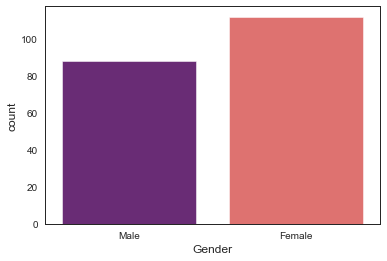

In [31]:
sns.countplot(x='Gender',data=mall_customers,palette='magma')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

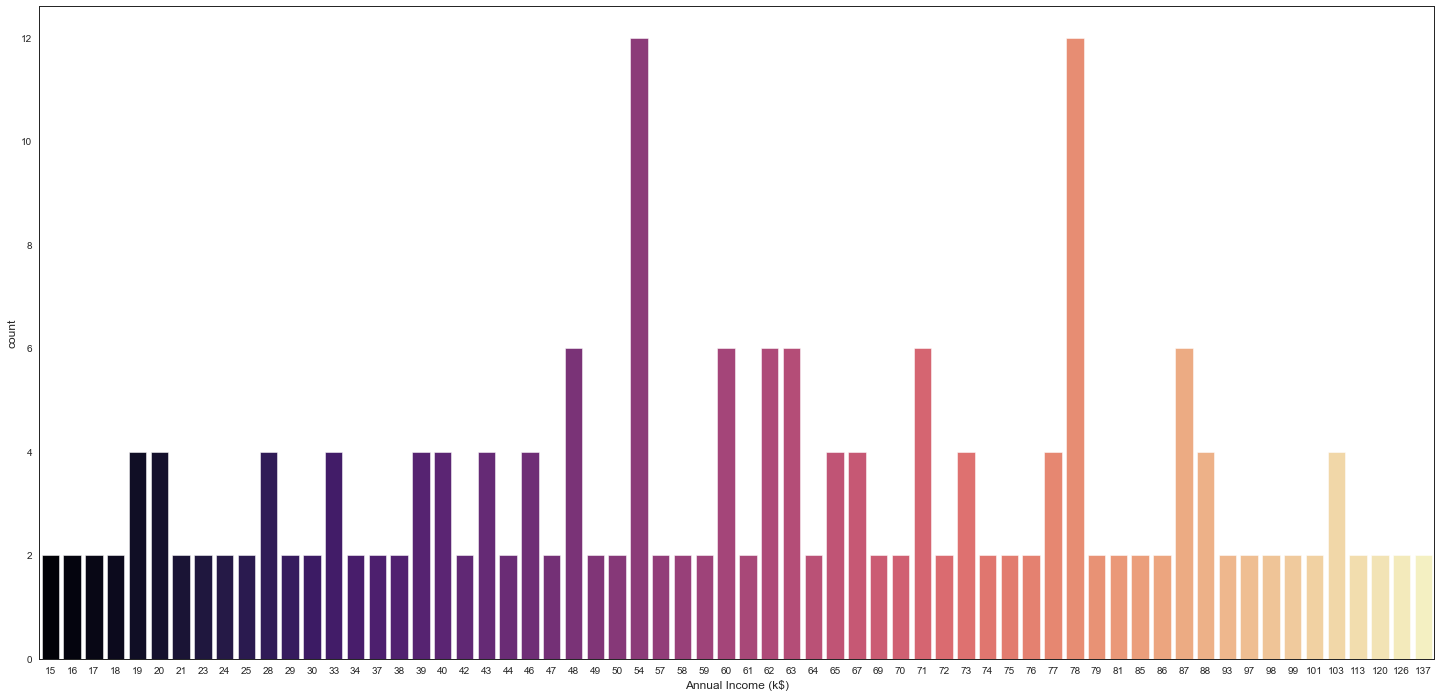

In [32]:
plt.figure(figsize=(25,12))
sns.countplot(x='Annual Income (k$)',data=mall_customers,palette='magma')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

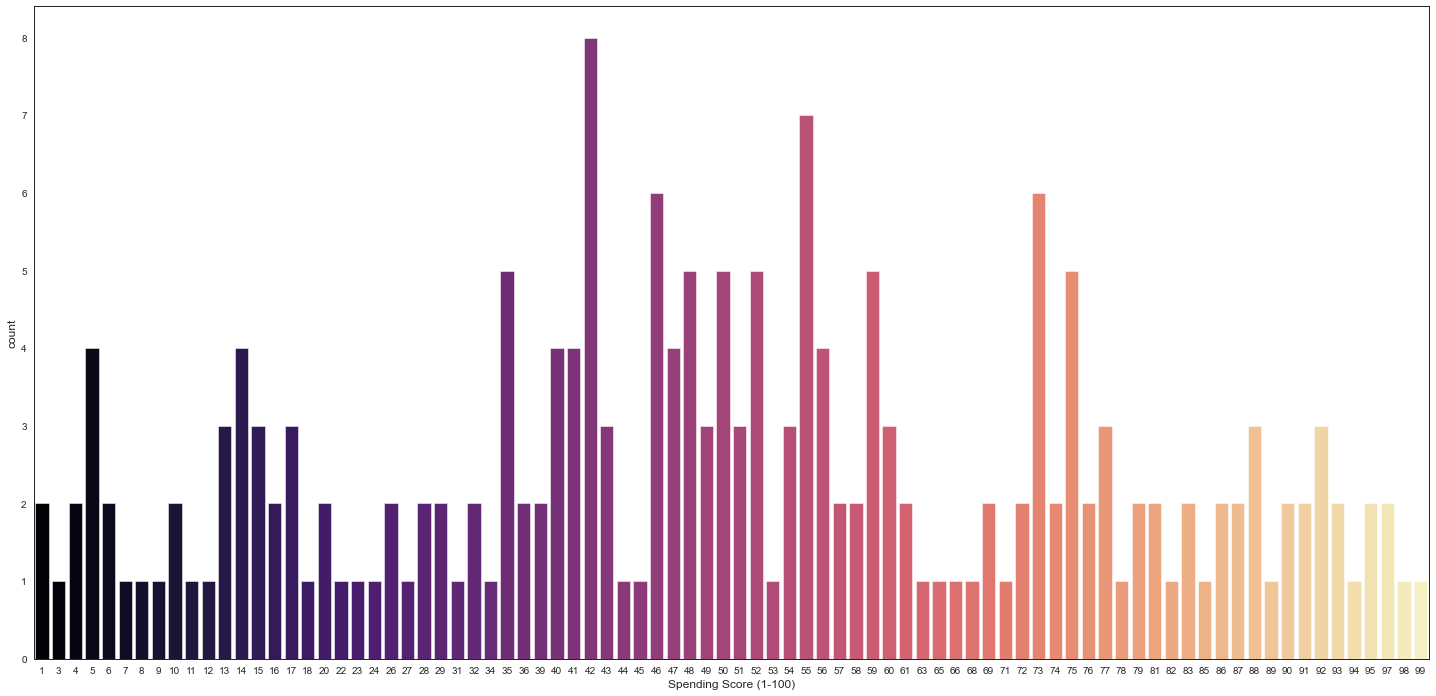

In [33]:
plt.figure(figsize=(25,12))
sns.countplot(x='Spending Score (1-100)',data=mall_customers,palette='magma')

In [34]:
X=mall_customers.iloc[:,[3,4]]

In [35]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**Elbow Method**

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss =[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Ai\projectvenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


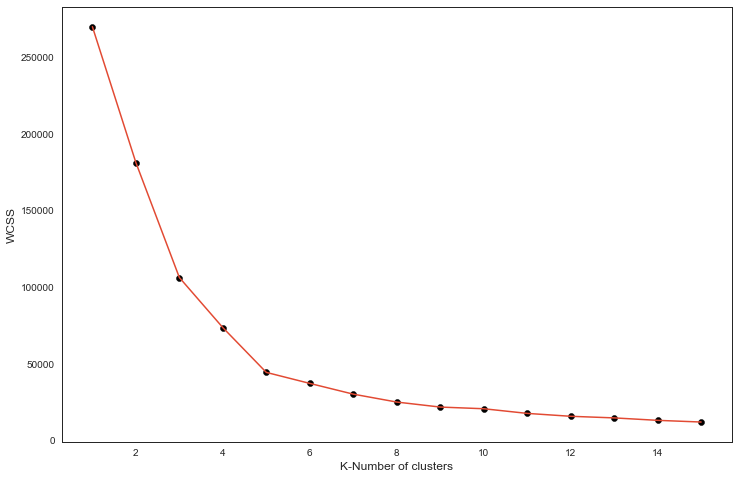

In [38]:
plt.figure(figsize=(12,8))
plt.plot(range(1,16),wcss)
plt.scatter(range(1,16),wcss,c='k')
plt.xlabel("K-Number of clusters")
plt.ylabel("WCSS")
plt.show()

# K=5

In [39]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [40]:
y_clusters=kmeans.predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [41]:
kmeans.inertia_

44448.45544793369

# Cluster Visualization

In [42]:
y_clusters.astype

<function ndarray.astype>

In [43]:
x_array=np.array(X)
x_array.astype

<function ndarray.astype>

E:\Ai\projectvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Spending')

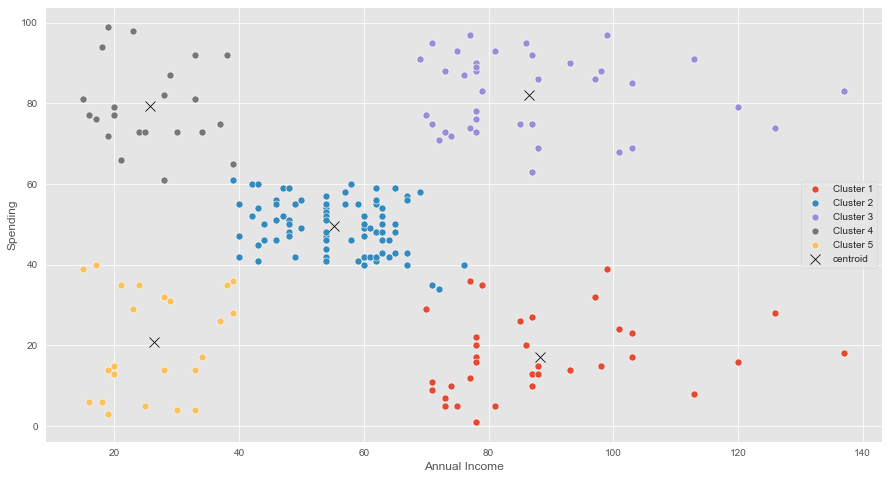

In [44]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
sns.scatterplot(x=x_array[y_clusters==0,0],y=x_array[y_clusters==0,1],label="Cluster 1",s=50)
sns.scatterplot(x=x_array[y_clusters==1,0],y=x_array[y_clusters==1,1],label="Cluster 2",s=50)
sns.scatterplot(x=x_array[y_clusters==2,0],y=x_array[y_clusters==2,1],label="Cluster 3",s=50)
sns.scatterplot(x=x_array[y_clusters==3,0],y=x_array[y_clusters==3,1],label="Cluster 4",s=50)
sns.scatterplot(x=x_array[y_clusters==4,0],y=x_array[y_clusters==4,1],label="Cluster 5",s=50)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x',color='black',label='centroid',s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending')

# Hierarchal Clustering

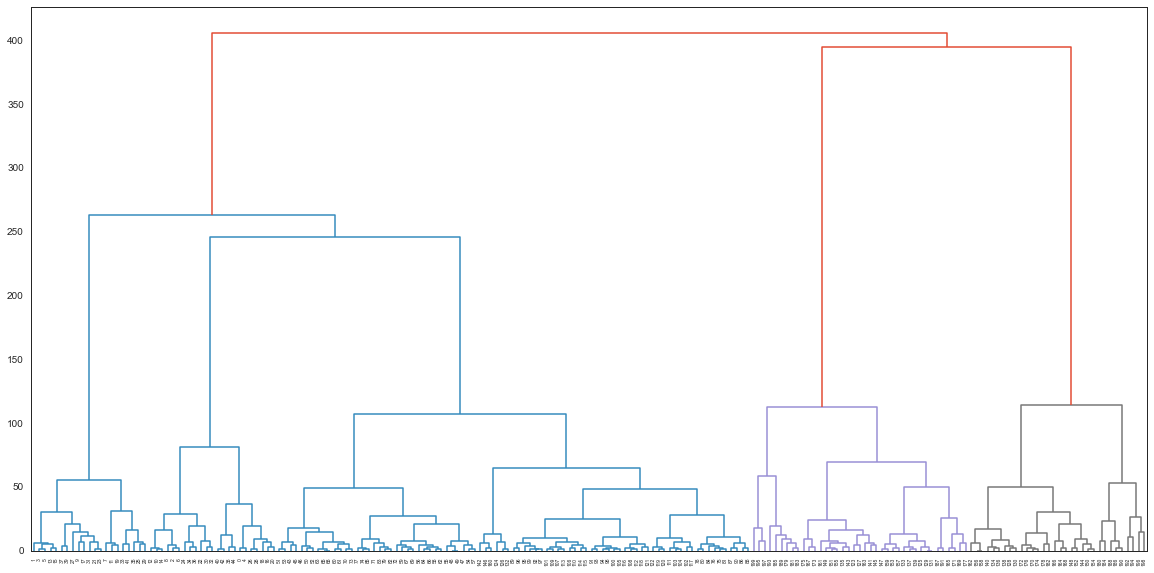

In [45]:
import scipy.cluster.hierarchy as sch
sns.set_style('white')
fig=plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [46]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')


In [47]:
y_hc=hc.fit_predict(X)

In [48]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

E:\Ai\projectvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Spending')

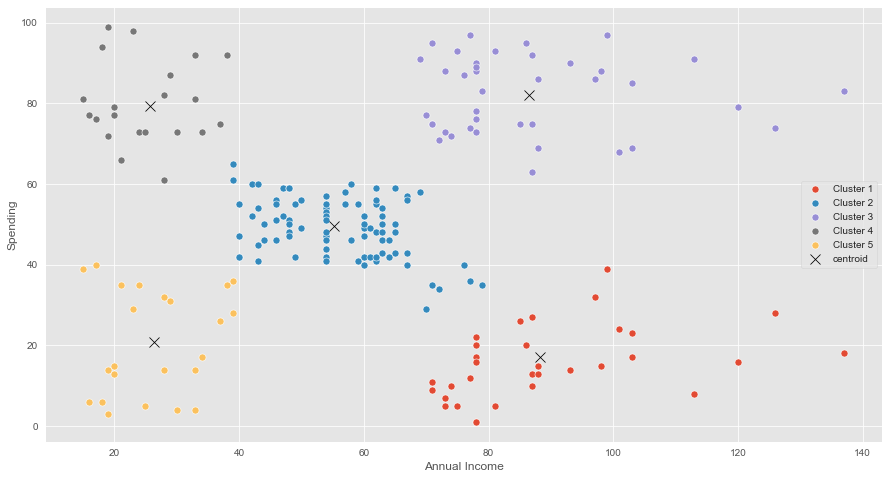

In [49]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
sns.scatterplot(x=x_array[y_hc==0,0],y=x_array[y_hc==0,1],label="Cluster 1",s=50)
sns.scatterplot(x=x_array[y_hc==1,0],y=x_array[y_hc==1,1],label="Cluster 2",s=50)
sns.scatterplot(x=x_array[y_hc==2,0],y=x_array[y_hc==2,1],label="Cluster 3",s=50)
sns.scatterplot(x=x_array[y_hc==3,0],y=x_array[y_hc==3,1],label="Cluster 4",s=50)
sns.scatterplot(x=x_array[y_hc==4,0],y=x_array[y_hc==4,1],label="Cluster 5",s=50)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x',color='black',label='centroid',s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending')
